# BIA 6304 Predictive Models Fall 2017
## Assignment 2 Kaggle Zillow Price Dataset
### Stuent:  Leonardo Ji
### 11/10/2017

### Import Standard packages

In [47]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
import seaborn as sns
color = sns.color_palette()
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

### Using your favorite analytic tool(s)….. (meaning you can use scikit-learn or R).

The goal of this assignment is to take a decent sized dataset (several feature and instances) and apply multiple TUNED classification models to find the best one. (You will also need to defend how you determine the “best”*). 

#### Dataset: 

Zillow Price dataset: https://www.kaggle.com/c/zillow-prize-1.

#### Task: 

1)	Preprocess and EDA data as needed. Don’t just do EDA, discuss what it tell you about the data and how it informs you in different decisions you make about the below models. 

2)	Run and tune at least the below methods. You will create several different tuning of each. Like KNN-3 AND KNN-5, using different distance measurements, Or SVM with kernels, cost functions and gammas, OR Random Forest with different "trys". Report your best tuned model for each. Don’t forget to CV. If you just did three tunings per model, you would be trying 36 different models on this dataset. That is probably a minimum. Grid search is your friend, but also your enemy if you ask it to search through too much. This is a great way to learn how to balance the two. 

* KNN	
* Decision Tree 
* Random Forest
* SVM Linear
* SVM RBF (be careful on this one as it will be slow to train. Think of ways to work around this limitation) 
* ANN (different hidden layers and nodes)
* Stochastic Gradient Descent
* Adaboost (use at least two different learners)
* Bagging Classifier (choose at least one learner)
* Gradient Boosting 
* Extra Trees
* Stacking

### Import Data

In [48]:
train_df = pd.read_csv("../input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [49]:
print(train_df.columns)

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')


In [50]:
prop_df = pd.read_csv("../input/properties_2016.csv", low_memory=False)
prop_df.shape

(2985217, 58)

#### Merge training dataset

In [51]:
dataset = pd.merge(train_df, prop_df, on='parcelid', how='left')
dataset.shape

(90275, 60)

In [52]:
dataset.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Exploratory data analysis

In [53]:
len(dataset)

90275

In [54]:
dataset.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

#### Lots of columns have missing values.  Fill those data point with column means.

In [55]:
missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df.tail()

,column_name,missing_count
48,yardbuildingsqft26,90180
43,storytypeid,90232
5,basementsqft,90232
15,finishedsquarefeet13,90242
8,buildingclasstypeid,90259


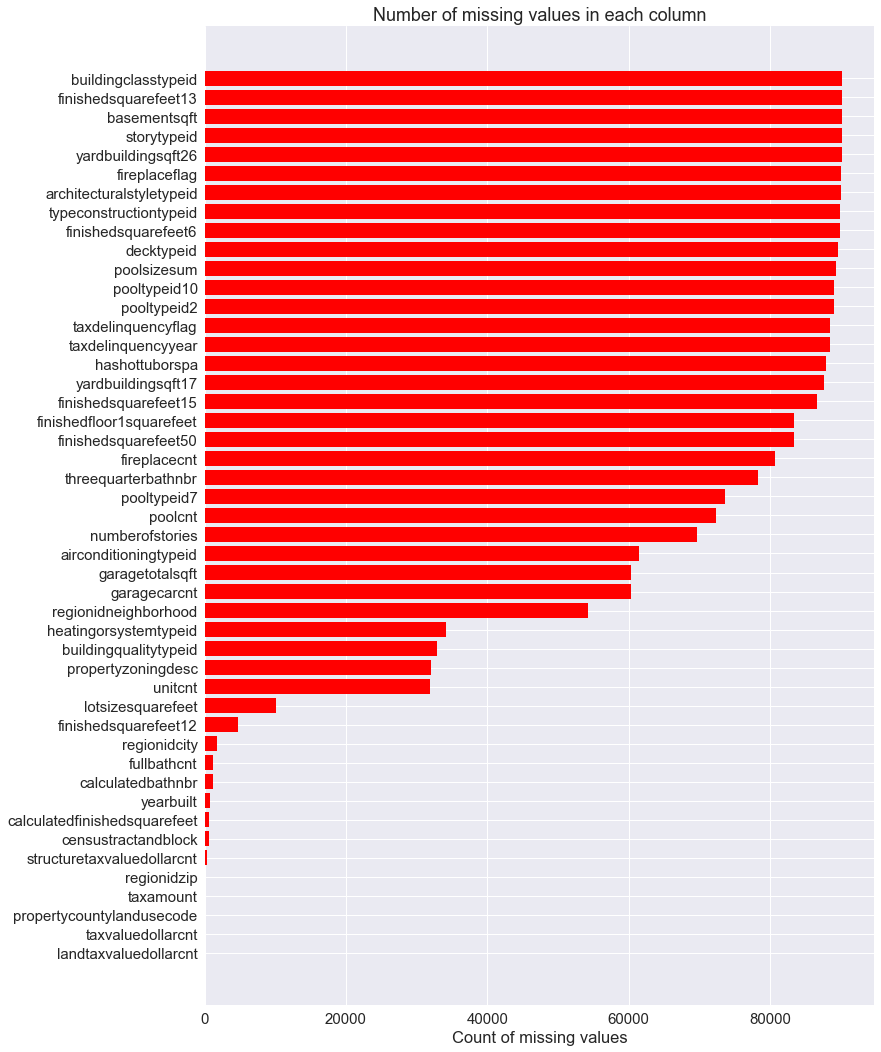

In [56]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [57]:
# fill missing values
dataset = dataset.where(pd.notnull(dataset), dataset.mean(), axis='columns')

In [58]:
dataset.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,...,1.440739,1,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,13.402692,6.037107e+13
1,14366692,-0.1684,2016-01-01,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,...,1.440739,1,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,13.402692,6.049151e+13
2,12098116,-0.0040,2016-01-01,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,...,1.440739,1,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,13.402692,6.037464e+13
3,12643413,0.0218,2016-01-02,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,...,1.440739,1,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,13.402692,6.037296e+13
4,14432541,-0.0050,2016-01-02,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,...,2.000000,1,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,13.402692,6.059042e+13


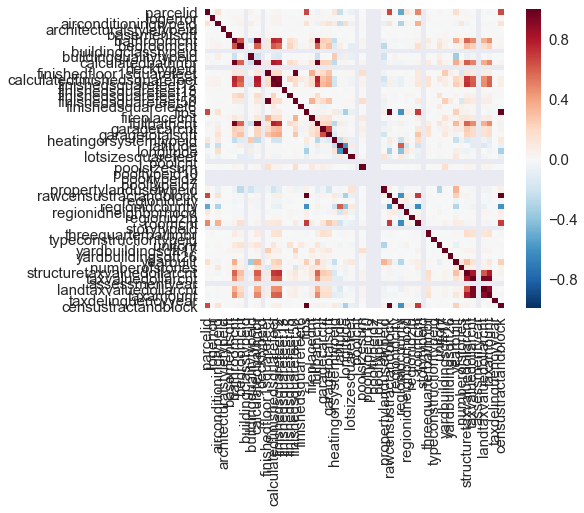

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(dataset.corr(), 
            cbar=True,
            annot=False,
            square=True,
            fmt='.2f')
plt.show()

In [60]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in dataset.columns if col not in ['logerror'] if dataset[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(dataset[col].values, dataset.logerror.values)[0,1])
    
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
corr_df

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,col_labels,corr_values
21,heatingorsystemtypeid,-0.019648
6,buildingqualitytypeid,-0.007880
49,taxamount,-0.006671
35,regionidzip,-0.006498
41,yardbuildingsqft17,-0.004337
23,longitude,-0.003432
40,unitcnt,-0.003362
34,regionidneighborhood,-0.003184
48,landtaxvaluedollarcnt,-0.003051
50,taxdelinquencyyear,-0.002215


#### Most of columns are float, five binary categorical columns.

In [61]:
dtype_df = dataset.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [62]:
for col in dataset.columns[3:]:
    dType = dataset[col].dtype
    # discretize (create dummies)
    # propertyzoningdesc create 2000 dummy variables, skip it for performance 
    if dType == object:
        print(col)
        saveColumn = dataset[col]
        del dataset[col]
        if (col != 'propertyzoningdesc'):
            dataset = pd.concat([dataset, pd.get_dummies(saveColumn, prefix=col)], axis=1)
dataset.shape

hashottuborspa
propertycountylandusecode
propertyzoningdesc
fireplaceflag
taxdelinquencyflag


(90275, 135)

#### Move those categorical columns to the front and all continuous columns at the end.

In [63]:
# copy target column to first 0 position
targetName = 'logerror'
targetSeries = dataset[targetName]
#remove target from current location and insert in collum 0
del dataset[targetName]
dataset.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
dataset.head()

,logerror,parcelid,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,propertycountylandusecode_1722,propertycountylandusecode_200,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_6050,propertycountylandusecode_73,propertycountylandusecode_8800,propertycountylandusecode_96,fireplaceflag_1.0,taxdelinquencyflag_Y
0,0.0276,11016594,2016-01-01,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,...,0,0,0,0,0,0,0,0,1,0
1,-0.1684,14366692,2016-01-01,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,...,0,0,0,0,0,0,0,0,1,0
2,-0.0040,12098116,2016-01-01,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,...,0,0,0,0,0,0,0,0,1,0
3,0.0218,12643413,2016-01-02,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,...,0,0,0,0,0,0,0,0,1,0
4,-0.0050,14432541,2016-01-02,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,...,0,0,0,0,0,0,0,0,1,0


In [64]:
dataset.shape

(90275, 135)

### The target variable is log error
$$ logerror=log(Zestimate)−log(SalePrice) $$

In [65]:
dataset.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

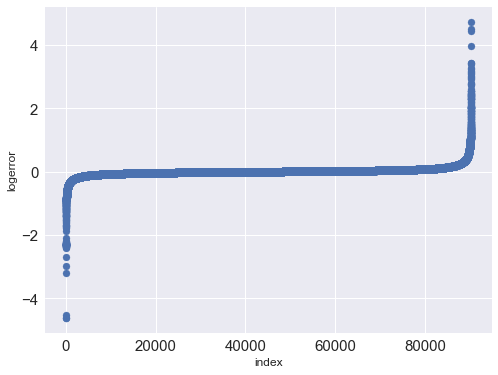

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(dataset)), np.sort(dataset.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

### If we use from 1 to 99 percentile then the data is more like normal curve

In [67]:
upperLimit = np.percentile(dataset.logerror.values, 99)
lowerLimit = np.percentile(dataset.logerror.values, 1)

subDataSet = dataset[dataset['logerror']>lowerLimit]
subDataSet = subDataSet[subDataSet['logerror']<upperLimit]

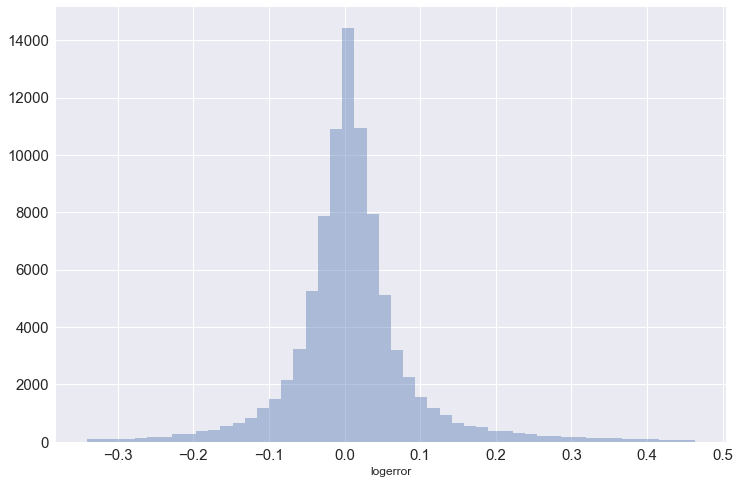

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(subDataSet.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### Separate data to target and features.

In [69]:
dataset.target=dataset['logerror'] 
dataset.features=dataset.iloc[:, 3:]                        
print(dataset.target.shape)
print(dataset.features.shape)
print(dataset.features.columns)

(90275,)
(90275, 132)
Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet',
       ...
       'propertycountylandusecode_1722', 'propertycountylandusecode_200',
       'propertycountylandusecode_34', 'propertycountylandusecode_38',
       'propertycountylandusecode_6050', 'propertycountylandusecode_73',
       'propertycountylandusecode_8800', 'propertycountylandusecode_96',
       'fireplaceflag_1.0', 'taxdelinquencyflag_Y'],
      dtype='object', length=132)


## Run Regression Models
### Linear Regression - Ordinary Least Squares

In [70]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression

# fit a linear regression model to the data
model_LR = LinearRegression()
model_LR.fit(dataset.features, dataset.target)
print(model_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [71]:
# make predictions
expected_LR = dataset.target
predicted_LR = model_LR.predict(dataset.features)

In [72]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LR, predicted_LR))
print("Mean Absolute Error:", mean_absolute_error(expected_LR, predicted_LR))
print("R2 Score:", r2_score(expected_LR, predicted_LR))
print("Explained Variance Score:", explained_variance_score(expected_LR, predicted_LR))
print("Score:", model_LR.score(dataset.features, dataset.target))
print("Coef:", model_LR.intercept_, model_LR.coef_)

Mean Squared Error: 0.0255678068567
Mean Absolute Error: 0.0683840939237
R2 Score: 0.0145801055359
Explained Variance Score: 0.0145801055359
Score: 0.0145801055359
Coef: 18.4256326025 [  3.69409696e-04   1.91582830e-03   9.64932041e-05  -1.95494644e-02
   1.50207641e-03  -3.77073581e-04   1.66704001e-04   1.21768064e-02
  -3.88364988e-04   1.15338554e-05   1.38435426e-05  -2.19900649e-07
   1.00250150e-04  -5.00784264e-06  -1.28489797e-05   2.80898465e-06
   3.64604115e-03   5.99381566e-04   6.13101234e-03   5.75512727e-04
  -2.57739666e-05  -6.03267347e-04  -1.58967514e-09   6.67077525e-09
   2.49350594e-09   1.14762898e-06  -1.27979344e-05   2.79623485e-06
  -7.93246826e-07   1.65009998e-06   8.58016790e-04  -7.23045212e-07
  -1.06997448e-09  -4.61399725e-05  -5.08897887e-09  -3.35746022e-07
  -6.23184893e-05  -8.17974511e-08   3.31273461e-02  -6.83126696e-03
   2.89693122e-04  -2.96754614e-05   3.10796181e-05  -2.29354128e-06
  -1.08865147e-03  -3.98427510e-07   4.33162382e-07   2.2

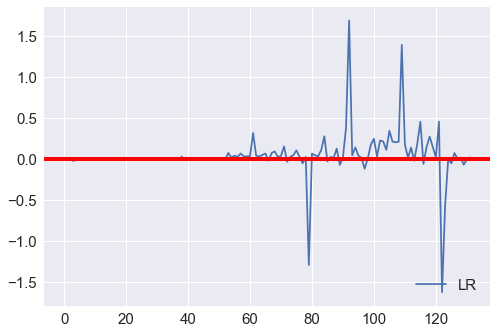

In [73]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

#### Run Cross Validation to check Overfitting
The results show wide variance so the model is overfitting.

In [74]:
from sklearn.cross_validation import train_test_split

X = dataset.features
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [75]:
model_LR.fit(X_train, y_train)
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [76]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LR.score(dataset.features, dataset.target),
        model_LR.score(dataset.features, dataset.target)))

MSE train: 0.025, test: 0.026
MSE train: 0.069, test: 0.068
R2 train: 0.016, test: 0.001
EVS train: 0.016, test: 0.001
Score train: 0.012, test: 0.012


In [42]:
scores = cross_val_score(model_LR, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [ 0.00759101  0.00374014 -0.00489969  0.00046574 -0.00363107 -0.0009787
  0.00631912 -0.00374338 -0.01395295  0.00641647]


-0.00026733034849384384

### END